In [11]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import logging
logging.basicConfig(level=logging.DEBUG, format='%(asctime)s - %(name)s - %(levelname)s - %(message)s')
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
import pandas as pd
import os
import sys
import numpy as np
import matplotlib.pyplot as plt

module_path = os.path.abspath(os.path.join(".."))
if module_path not in sys.path:
    sys.path.append(module_path)

# Load Data

In [13]:
# experiment specific
result_base_dir = "ss1FDR_BBM_647_P241_02_07_ssDDA_MIA_001_ScanByScan_RTtol0.0_threshold_missabthres0.5_convergence_NoIntercept_exp"

In [14]:
# edit experiment specific data path and config
import json

result_parent_dir = "/cmnfs/proj/ORIGINS/data/ecoli/ss/DDA/raw/msconvert/"
MS1Scans_NoArray_path = (
    "/cmnfs/proj/ORIGINS/data/ecoli/ss/DDA/raw/msconvert/"
    "BBM_647_P241_02_07_ssDDA_MIA_001_MS1Scans_NoArray.csv"
)
result_dir = os.path.join(result_parent_dir, result_base_dir)
with open(os.path.join(result_dir, "param.json"), mode="r", encoding="utf-8") as file:
    config = json.load(file)
output_file = os.path.join(result_dir, "output")  # filename
maxquant_file_exp = config["MQ_exp_path"]
maxquant_file_ref = os.path.join(result_dir, "maxquant_result_ref.pkl")

In [15]:
# Load data
MS1Scans_NoArray = pd.read_csv(MS1Scans_NoArray_path)
Maxquant_result_dict = pd.read_pickle(filepath_or_buffer=maxquant_file_ref)
Maxquant_result_dict.index = Maxquant_result_dict["id"]
Maxquant_result_exp = pd.read_csv(
    filepath_or_buffer=maxquant_file_exp, sep="\t")
scan_record = pd.read_pickle(output_file + "_scan_record.pkl")
sum_raw = pd.read_csv(os.path.join(result_dir, "sum_raw.csv"))
sum_minima = pd.read_csv(os.path.join(result_dir, "sum_minima.csv"))
sum_gaussian = pd.read_csv(os.path.join(result_dir, "sum_gaussian.csv"))
sum_peak = pd.read_csv(os.path.join(result_dir, "sum_peak.csv"))

# Load SBS Result class

2024-03-05 08:35:54,112 - result_analysis.compare_maxquant - DEBUG - Maxquant experiment file has 19186 entries.
2024-03-05 08:35:54,114 - result_analysis.compare_maxquant - DEBUG - columns after merge MQ dict and MQ exp Index(['Modified sequence', 'Charge', 'predicted_RT', 'm/z', 'Mass', 'Length',
       'id', 'RT_search_left', 'RT_search_right',
       'Calibrated retention time start', 'Calibrated retention time finish',
       'Calibrated retention time', 'Retention time', 'Intensity', '_merge'],
      dtype='object')
2024-03-05 08:35:54,574 - result_analysis.compare_maxquant - INFO - RT overlap counts: full_overlap       18973
partial_overlap      165
no_overlap            48
Name: RT_overlap, dtype: int64


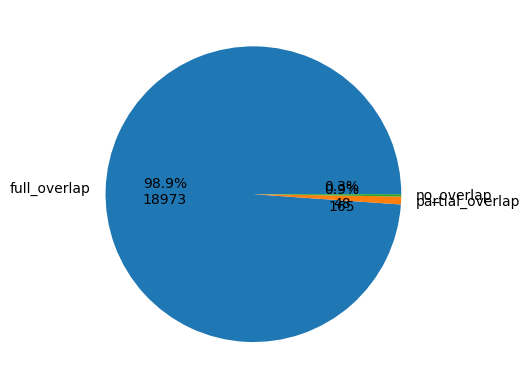

2024-03-05 08:35:56,028 - result_analysis.result_analysis - INFO - No filter_by_rt_overlap is specified, use all entries for plotting.
2024-03-05 08:35:56,138 - result_analysis.compare_maxquant - INFO - Removing 223 entries with aggregation over PCM, 18963 entries left.
2024-03-05 08:35:56,139 - result_analysis.compare_maxquant - DEBUG - columns after agg Index(['Modified sequence', 'Charge', 'Calibrated retention time start',
       'Calibrated retention time finish', 'Calibrated retention time',
       'Retention time', 'Intensity', 'id', 'Mass', 'm/z', 'Length'],
      dtype='object')


In [16]:
%autoreload 2
from result_analysis.result_analysis import SBSResult
plt.rc("font", size = 10)
SBS_ss1FDR_PSM = SBSResult(maxquant_ref_df=Maxquant_result_dict,
                           maxquant_exp_df=Maxquant_result_exp,
                           sum_raw = sum_raw,
                           sum_peak=sum_peak,
                           sum_gaussian=sum_gaussian,
                           sum_minima=sum_minima)
SBS_ss1FDR_PSM.compare_with_maxquant_exp_int(filter_by_rt_overlap=None, save_dir=None)

/cmnfs/proj/ORIGINS/protMSD/maxquant/ScanByScan/result_analysis/result_analysis.py:370: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.ref_df_non_zero["precursor"] = self.ref_df_non_zero[
2024-03-05 08:37:07,567 - matplotlib.font_manager - DEBUG - findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=16.0.
2024-03-05 08:37:07,568 - matplotlib.font_manager - DEBUG - findfont: score(FontEntry(fname='/cmnfs/home/z.xiao/.local/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans-Bold.ttf', name='DejaVu Sans', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 0.33499999999999996
2024-03-05 08:37:07,569 - matplotlib.font_manager - DEBUG - findfont: score(FontE

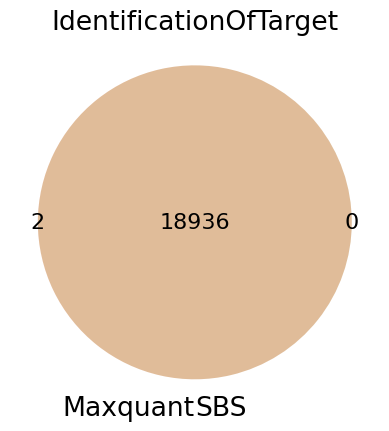

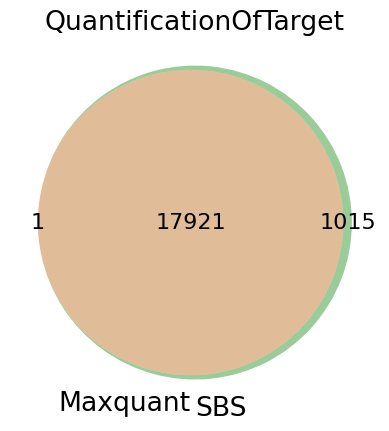

In [17]:
plt.rc("font", size=16)
SBS_ss1FDR_PSM.plot_overlap_with_MQ()

Data:  Intensity_log AUCActivationGaussianKernel_log , slope =  0.72 , intercept =  0.867 , PearsonR =  0.682 , SpearmanR =  0.654


2024-03-04 09:35:18,558 - matplotlib.font_manager - DEBUG - findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=13.0.
2024-03-04 09:35:18,561 - matplotlib.font_manager - DEBUG - findfont: score(FontEntry(fname='/cmnfs/home/z.xiao/.local/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans-Bold.ttf', name='DejaVu Sans', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 0.33499999999999996
2024-03-04 09:35:18,562 - matplotlib.font_manager - DEBUG - findfont: score(FontEntry(fname='/cmnfs/home/z.xiao/.local/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerifDisplay.ttf', name='DejaVu Serif Display', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2024-03-04 09:35:18,562 - matplotlib.font_manager - DEBUG - findfont: score(FontEntry(fname='/cmnfs/home/z.xiao/.local/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizTwoSymBol.

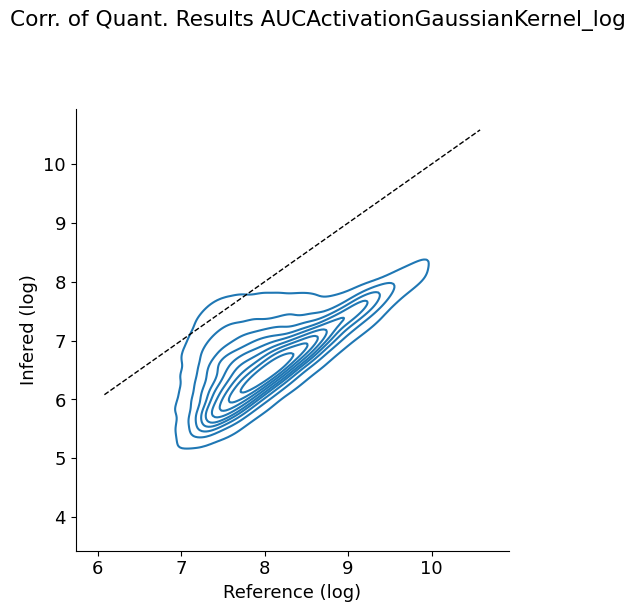

In [8]:
plt.rc("font", size=13)
SBS_ss1FDR_PSM.plot_intensity_corr(
    inf_col="AUCActivationGaussianKernel",
    interactive=False,
    save_dir=None,
    contour=True,
    # color=SBS_ss1FDR_PSM.ref_exp_df_inner["Length"],
)

2024-03-04 09:38:44,327 - result_analysis.compare_maxquant - DEBUG - Maxquant experiment file has 19186 entries.
2024-03-04 09:38:44,328 - result_analysis.compare_maxquant - DEBUG - columns after merge MQ dict and MQ exp Index(['Modified sequence', 'Charge', 'predicted_RT', 'm/z', 'Mass', 'Length',
       'id', 'RT_search_left', 'RT_search_right',
       'Calibrated retention time start', 'Calibrated retention time finish',
       'Calibrated retention time', 'Retention time', 'Intensity', '_merge'],
      dtype='object')
2024-03-04 09:38:44,605 - result_analysis.compare_maxquant - INFO - RT overlap counts: full_overlap       17185
no_overlap          1469
partial_overlap      532
Name: RT_overlap, dtype: int64


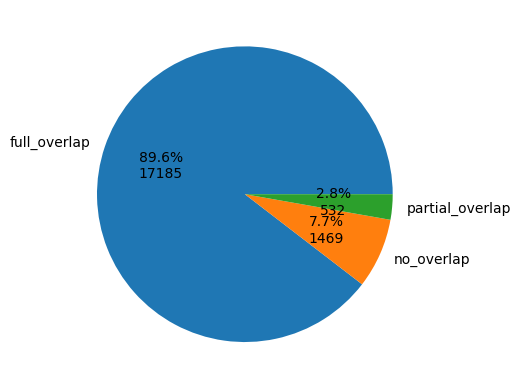

2024-03-04 09:38:44,706 - result_analysis.result_analysis - INFO - No filter_by_rt_overlap is specified, use all entries for plotting.
2024-03-04 09:38:44,726 - result_analysis.compare_maxquant - INFO - Removing 223 entries with aggregation over PCM, 18963 entries left.
2024-03-04 09:38:44,727 - result_analysis.compare_maxquant - DEBUG - columns after agg Index(['Modified sequence', 'Charge', 'Calibrated retention time start',
       'Calibrated retention time finish', 'Calibrated retention time',
       'Retention time', 'Intensity', 'id', 'Mass', 'm/z', 'Length'],
      dtype='object')


Data:  Intensity_log AUCActivationPeakCls_log , slope =  0.781 , intercept =  0.185 , PearsonR =  0.715 , SpearmanR =  0.711


2024-03-04 09:39:03,348 - matplotlib.font_manager - DEBUG - findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0.
2024-03-04 09:39:03,350 - matplotlib.font_manager - DEBUG - findfont: score(FontEntry(fname='/cmnfs/home/z.xiao/.local/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans-Bold.ttf', name='DejaVu Sans', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 0.33499999999999996
2024-03-04 09:39:03,351 - matplotlib.font_manager - DEBUG - findfont: score(FontEntry(fname='/cmnfs/home/z.xiao/.local/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerifDisplay.ttf', name='DejaVu Serif Display', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2024-03-04 09:39:03,351 - matplotlib.font_manager - DEBUG - findfont: score(FontEntry(fname='/cmnfs/home/z.xiao/.local/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizTwoSymBol.

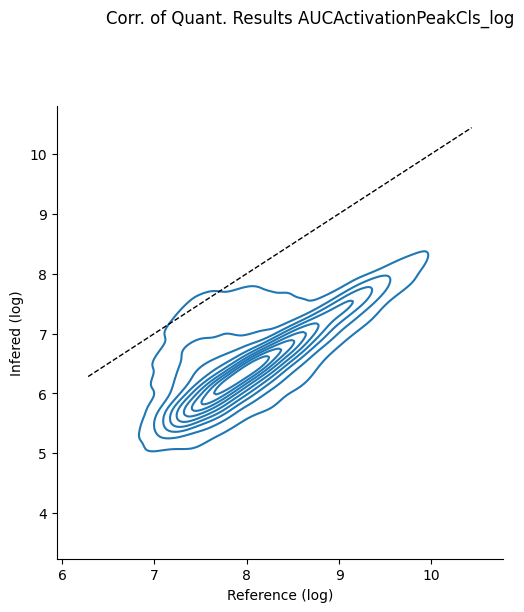

In [10]:
sum_peak_cls = pd.read_csv(
    os.path.join(
        result_dir,
        "report",
        "peak_selection_5d_input_remove_large_RT_diff_true_peaks",
        "sum_peak_cls.csv",
    )
)
plt.rc("font", size=10)
SBS_ss1FDR_PSM_peak_cls = SBSResult(
    maxquant_ref_df=Maxquant_result_dict,
    maxquant_exp_df=Maxquant_result_exp,
    sum_peak=sum_peak_cls,
)
SBS_ss1FDR_PSM_peak_cls.compare_with_maxquant_exp_int(
    filter_by_rt_overlap=None, save_dir=None
)
SBS_ss1FDR_PSM_peak_cls.plot_intensity_corr(
    inf_col="AUCActivationPeakCls",
    interactive=False,
    save_dir=None,
    contour=True,
    # color=SBS_ss1FDR_PSM.ref_exp_df_inner["Length"],
)

In [56]:
for sum_col in SBS_ss1FDR_PSM.sum_cols:
    SBS_ss1FDR_PSM.plot_intensity_corr(
        inf_col=sum_col, interactive=False, save_dir=None
    )

Data:  Intensity_log SumActivationRaw_log , slope =  0.981 , intercept =  0.257 , PearsonR =  0.72 , SpearmanR =  0.68
Data:  Intensity_log AUCActivationRaw_log , slope =  0.984 , intercept =  -1.536 , PearsonR =  0.723 , SpearmanR =  0.683
Data:  Intensity_log TRPZActivationRaw_log , slope =  0.984 , intercept =  -1.536 , PearsonR =  0.723 , SpearmanR =  0.683
Data:  Intensity_log AUCActivationPeak_log , slope =  1.245 , intercept =  -3.961 , PearsonR =  0.811 , SpearmanR =  0.79
Data:  Intensity_log SumActivationGaussianKernel_log , slope =  0.986 , intercept =  0.223 , PearsonR =  0.721 , SpearmanR =  0.681
Data:  Intensity_log AUCActivationGaussianKernel_log , slope =  0.989 , intercept =  -1.569 , PearsonR =  0.724 , SpearmanR =  0.683
Data:  Intensity_log TRPZActivationGaussianKernel_log , slope =  0.989 , intercept =  -1.569 , PearsonR =  0.724 , SpearmanR =  0.683
Data:  Intensity_log SumActivationLocalMinima_log , slope =  0.982 , intercept =  0.312 , PearsonR =  0.713 , Spear

In [57]:
SBS_ss1FDR_PSM.plot_intensity_corr(
    ref_col="Intensity",
    inf_col="AUCActivationPeak",
    interactive=True,
    hover_data=["id", "Modified sequence", "Charge"],
)

Data:  Intensity_log AUCActivationPeak_log , slope =  1.245 , intercept =  -3.961 , PearsonR =  0.811 , SpearmanR =  0.79


/cmnfs/proj/ORIGINS/protMSD/maxquant/ScanByScan/result_analysis/result_analysis.py:370: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.ref_df_non_zero["precursor"] = self.ref_df_non_zero[


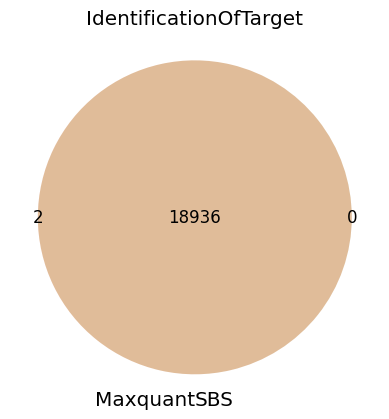

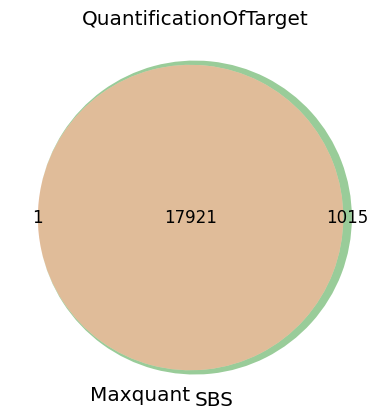

In [9]:
import matplotlib.pyplot as plt

plt.rc("font", size=12)
SBS_ss1FDR_PSM.plot_overlap_with_MQ(
    show_ref=False, save_dir=None, save_format="png")

In [59]:
plt.rc("font", size=12)
SBS_ss1FDR_PSM.eval_target_decoy(save_dir=config["report_dir"])

2024-02-01 10:55:40,359 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-02-01 10:55:40,392 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-02-01 10:55:40,455 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-02-01 10:55:40,491 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


id  AUCActivationRaw
Reverse                         
0        51740      8.021742e+06
1          107      4.709094e+06

## Report

In [60]:
%autoreload 2
from result_analysis import result_analysis

scan_record = result_analysis.generate_result_report(
    scan_record=scan_record,
    intensity_cols=[SBS_ss1FDR_PSM.ref_df[col] for col in SBS_ss1FDR_PSM.sum_cols]
    + [SBS_ss1FDR_PSM.ref_exp_df_inner["Intensity"]],
    save_dir=config["report_dir"],
)
scan_record.to_csv(output_file + "_scan_record.csv")

-------------- SumActivationRaw -----------------
Non zero intensity in SumActivationRaw = 51847
-------------- AUCActivationRaw -----------------
Non zero intensity in AUCActivationRaw = 51847
-------------- TRPZActivationRaw -----------------
Non zero intensity in TRPZActivationRaw = 51847
-------------- AUCActivationPeak -----------------
Non zero intensity in AUCActivationPeak = 51844
-------------- SumActivationGaussianKernel -----------------
Non zero intensity in SumActivationGaussianKernel = 51847
-------------- AUCActivationGaussianKernel -----------------
Non zero intensity in AUCActivationGaussianKernel = 51847
-------------- TRPZActivationGaussianKernel -----------------
Non zero intensity in TRPZActivationGaussianKernel = 51847
-------------- SumActivationLocalMinima -----------------
Non zero intensity in SumActivationLocalMinima = 51847
-------------- AUCActivationLocalMinima -----------------
Non zero intensity in AUCActivationLocalMinima = 51847
-------------- TRPZActi

# Alphas (no applicable with "threshold" as optimization algo)

In [61]:
%autoreload 2
from result_analysis.result_analysis import plot_alphas_across_scan
plot_alphas_across_scan(
    scan_record=scan_record, x="Time", save_dir=config["report_dir"]
)

2024-02-01 10:55:49,102 - result_analysis.result_analysis - INFO - Alpha range: [   nan 0.e+00 1.e-04 1.e-03 1.e-02 1.e-05 1.e-01 1.e+00], replacing all zeros with 1.0000000000000002e-06


# Precursor specific trouble shooting

In [68]:
# Load activation matrix
activation = np.load(output_file + "_activationByScanFromLasso.npy")
refit_activation_minima = np.load(output_file + "_activationMinima.npy")
refit_activation_gaussian = np.load(output_file + "_activationGaussian.npy")
try:
    cos_dist = np.load(output_file + "_precursor_scan_CosDist.npy")
    cos_dist_df = pd.DataFrame(cos_dist, index=Maxquant_result_dict["id"])
except FileNotFoundError:
    logging.info("Cosine distance matrix not found")
    pass

[autoreload of postprocessing.peak_selection failed: Traceback (most recent call last):
  File "/cmnfs/home/z.xiao/miniconda3/envs/sbs/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 276, in check
    superreload(m, reload, self.old_objects)
  File "/cmnfs/home/z.xiao/miniconda3/envs/sbs/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 475, in superreload
    module = reload(module)
  File "/cmnfs/home/z.xiao/miniconda3/envs/sbs/lib/python3.10/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 619, in _exec
  File "<frozen importlib._bootstrap_external>", line 883, in exec_module
  File "<frozen importlib._bootstrap>", line 241, in _call_with_frames_removed
  File "/cmnfs/proj/ORIGINS/protMSD/maxquant/ScanByScan/postprocessing/peak_selection.py", line 32, in <module>
    from utils.tools import _perc_fmt
ImportError: cannot import name '_perc_fmt' from 'utils.tools' (/cmnfs

## Plot Activation

In [69]:
# Load data

# Load MS1 scans from pkl or mzml file
import pickle

msconvert_file = "/cmnfs/proj/ORIGINS/data/ecoli/ss/DDA/raw/msconvert/BBM_647_P241_02_07_ssDDA_MIA_001.pkl"
with open(msconvert_file, "rb") as f:
    MS1Scans = pickle.load(f)

# Load activation
activation_df = pd.DataFrame(activation, index=Maxquant_result_dict["id"])
minima_activation_df = pd.DataFrame(
    refit_activation_minima, index=Maxquant_result_dict["id"]
)
gaussian_activation_df = pd.DataFrame(
    refit_activation_gaussian, index=Maxquant_result_dict["id"]
)

2024-02-01 15:04:44,413 - utils.plot - DEBUG - RT search range: [21.632645642265175, 23.632645642265175]
2024-02-01 15:04:44,420 - utils.plot - DEBUG - ScanIdx: Int64Index([1538, 1539, 1540, 1541, 1542, 1543, 1544, 1545, 1546, 1547,
            ...
            1644, 1645, 1646, 1647, 1648, 1649, 1650, 1651, 1652, 1653],
           dtype='int64', length=116)


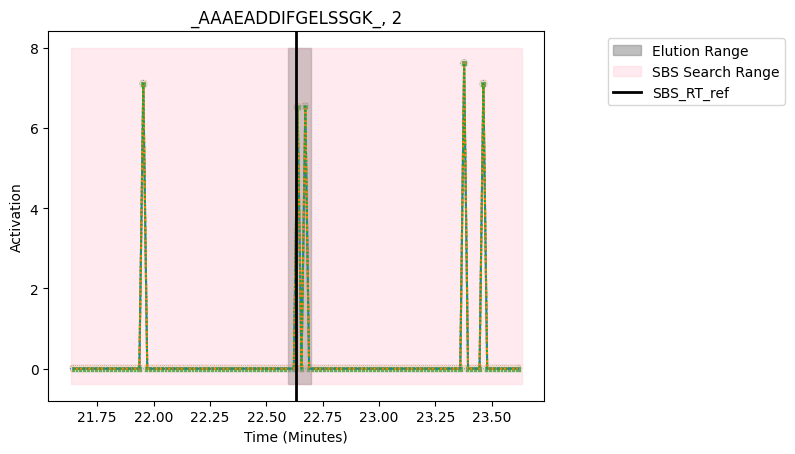

In [70]:
%autoreload 2
from utils import plot
precursor_id = 13
act_in_range = plot.plot_activation(maxquant_ref_row=Maxquant_result_dict.loc[precursor_id, :],
                                    maxquant_exp_df=Maxquant_result_exp,
                                    precursor_activations=[activation_df.loc[precursor_id, :],
                                    minima_activation_df.loc[precursor_id, :],
                                    gaussian_activation_df.loc[precursor_id, :]],
                                        precursor_cos_dists = None,
                                        activation_labels=['Raw', "Minima", "Gaussian"],
                                        cos_dist_labels=None,
                                        ms1scan_no_array=MS1Scans_NoArray,
                                        log_intensity=True,    
                                        x_ticks='time',
                                        save_dir=None,
                                        save_format='svg')

## Plot Isotope Pattern and Obs Int

In [ ]:
%autoreload 2
from result_analysis.result_analysis import plot_isopattern_and_obs
plot_isopattern_and_obs(MS1Scans=MS1Scans, 
                              Maxquant_result=Maxquant_result_dict, 
                              scan_idx = 639, 
                              precursor_id=[44321], 
                              log_intensity=False)

In [ ]:
alignment[303]["abundance"].sum()
IsotopeNotObs[303]["abundance"].sum()

In [ ]:
Maxquant_result.loc[11557, "IsoAbundance"].sum()

In [ ]:
idx = np.where(filteredPrecursorIdx == 18082)
activationByScan[idx]

In [ ]:
import IsoSpecPy as iso

pair = [18083, 18082]
Maxquant_result.loc[
    pair, ["Modified sequence", "Charge", "Retention time", "Intensity", "m/z"]
]
iso.ParseFASTA(Maxquant_result.loc[pair[0], "Modified sequence"])
iso.ParseFASTA(Maxquant_result.loc[pair[1], "Modified sequence"])

In [ ]:
import IsoSpecPy as iso

Maxquant_result.loc[
    [738, 10695], ["Modified sequence", "Charge",
                   "Retention time", "Intensity", "m/z"]
]
iso.ParseFASTA(Maxquant_result.loc[738, "Modified sequence"])
iso.ParseFASTA(Maxquant_result.loc[10695, "Modified sequence"])

In [ ]:
pair = [15879, 12747]
Maxquant_result.loc[
    pair, ["Modified sequence", "Charge", "Retention time", "Intensity", "m/z"]
]
iso.ParseFASTA(Maxquant_result.loc[pair[0], "Modified sequence"])
iso.ParseFASTA(Maxquant_result.loc[pair[1], "Modified sequence"])

In [ ]:
pair = [3772, 3774]
Maxquant_result.loc[
    pair, ["Modified sequence", "Charge", "Retention time", "Intensity", "m/z"]
]
iso.ParseFASTA(Maxquant_result.loc[pair[0], "Modified sequence"])
iso.ParseFASTA(Maxquant_result.loc[pair[1], "Modified sequence"])

In [ ]:
pair = [15120, 14965]
Maxquant_result.loc[
    pair, ["Modified sequence", "Charge", "Retention time", "Intensity", "m/z"]
]
iso.ParseFASTA(Maxquant_result.loc[pair[0], "Modified sequence"])
iso.ParseFASTA(Maxquant_result.loc[pair[1], "Modified sequence"])